---
title: "Tutorial 4"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: false
    code-summary: "Show the code"
---

## Topics

1. K-means clustering

2. Hierarchical clustering

## K-Means Clustering

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. These traits make implementing k-means clustering in Python reasonably straightforward, even for novice programmers and data scientists.

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers.

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

https://realpython.com/k-means-clustering-python/#:~:text=The%20k%2Dmeans%20clustering%20method,data%20objects%20in%20a%20dataset.&text=You'll%20walk%20through%20an,the%20data%20to%20evaluating%20results.

## Example

In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

### Starting from the end

Before getting to the algorithm itself, let's see what K-Means actually does

### Create random data grouped in four "blobs"

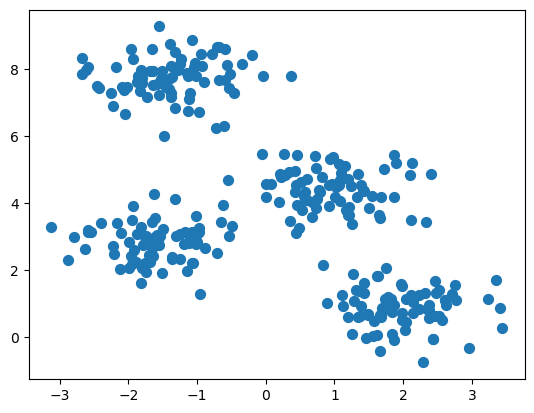

In [5]:
X, y_true = make_blobs(n_samples=300, 
                       centers=4,
                       cluster_std=0.60, 
                       random_state=0)
plt.scatter(X[:, 0],
            X[:, 1],
            s=50);

### Calculate K-Means

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
clusters_kmeans = kmeans.predict(X)
clusters_kmeans

C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 1, 2, 1, 0, 0, 3, 2, 1, 1, 3, 1, 2, 1, 0, 2, 2, 0, 3, 3, 0, 0,
       2, 3, 3, 2, 0, 2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 0, 2, 3, 2, 2,
       3, 3, 1, 3, 1, 0, 3, 0, 1, 0, 0, 3, 1, 3, 1, 0, 1, 2, 1, 3, 3, 3,
       1, 0, 1, 3, 2, 3, 1, 3, 3, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 3, 3, 2, 0, 0, 2, 3, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2,
       3, 3, 0, 1, 0, 2, 1, 0, 0, 2, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 1, 3,
       3, 0, 1, 3, 3, 1, 2, 1, 1, 3, 2, 3, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2,
       0, 3, 1, 3, 0, 2, 1, 2, 2, 0, 2, 3, 3, 2, 0, 2, 2, 1, 0, 2, 3, 1,
       0, 0, 2, 3, 0, 2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 1, 2, 3, 0, 3, 2, 1, 3, 1, 2, 1, 2, 3, 2, 2, 1, 3, 3, 0, 0, 2,
       1, 0, 0, 3, 0, 3, 2, 1, 1, 2, 2, 1, 2, 0, 3, 2, 0, 3, 1, 3, 0, 2,
       0, 1, 1, 1, 1, 3, 3, 1, 2, 3, 0, 2, 3, 3, 3, 0, 0, 1, 2, 2, 3, 0,
       1, 3, 2, 1, 2, 0, 0, 3, 3, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0,
       1, 3, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 3])

In [7]:
len(clusters_kmeans)

300

### Plot results

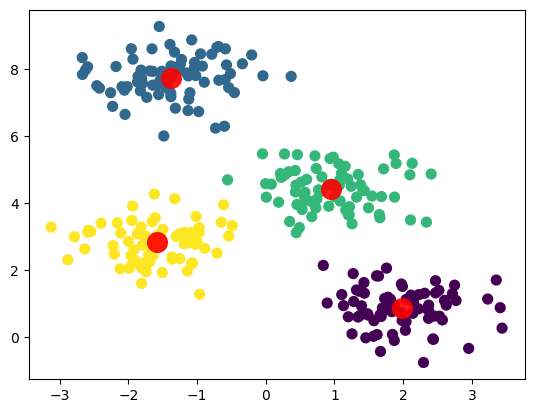

In [8]:
# blobs
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=clusters_kmeans, 
            s=50, 
            cmap='viridis')

# center of blob
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], 
            centers[:, 1], 
            c='red', 
            s=200, 
            alpha=0.9)

### How does the algorithm work?

K-Means uses the Expectation-Maximization Algorithm

How does this work?

1. Guess some cluster centers
2. Repeat until converged
    * E-Step: assign points to the nearest cluster center
    * M-Step: set the cluster centers to the mean
    
The "E-step" or "Expectation step" involves updating our expectation of which cluster each point belongs to. 

The "M-step" or "Maximization step" involves maximizing some fitness function that defines the location of the cluster centers. In this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

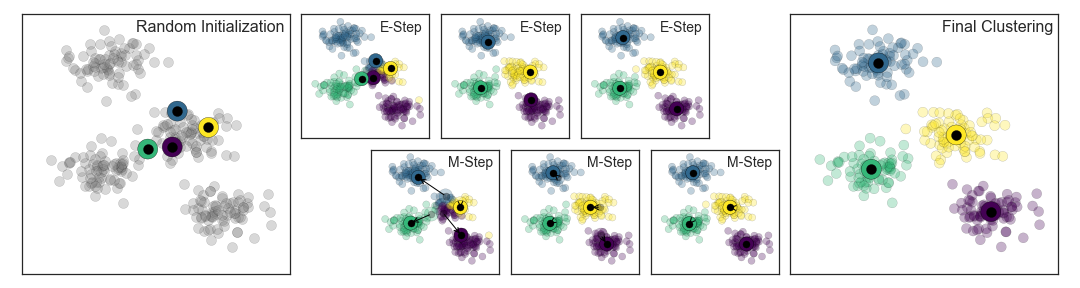

In [6]:
%matplotlib inline
from IPython.display import Image
Image('image_1.png')

### Visualisation 
Here is a [cool video](https://www.youtube.com/watch?v=nXY6PxAaOk0) for visualising the prosses of K-means clustering.

### Choosing the right number of clusters

We'll look at two methods for choosing the correct number of clusters.

The elbow method and the silhouette method. We can use these methods together. No need to pick just one.

The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge.

SSE is defined as the sum of the squared distance between centroid and each member of the cluster.

### The elbow method

To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE.

In [9]:
# loop over different numbers of clusters
kmeans_kwargs = {"init": "random",
                 "n_init": 10,
                 "max_iter": 300,
                 "random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    error = kmeans.inertia_
    sse.append(kmeans.inertia_)
    print(f"With {k} clusters the SSE was {error}")

C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 1 clusters the SSE was 2812.1375953032334


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 2 clusters the SSE was 1190.7823593643443


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 3 clusters the SSE was 546.8911504626299


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 4 clusters the SSE was 212.00599621083478


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 5 clusters the SSE was 188.77323556773717


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 6 clusters the SSE was 170.94840955438684


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 7 clusters the SSE was 154.88486181576044


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 8 clusters the SSE was 139.20927769246356


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 9 clusters the SSE was 126.56204002887225


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 10 clusters the SSE was 111.85910548742537


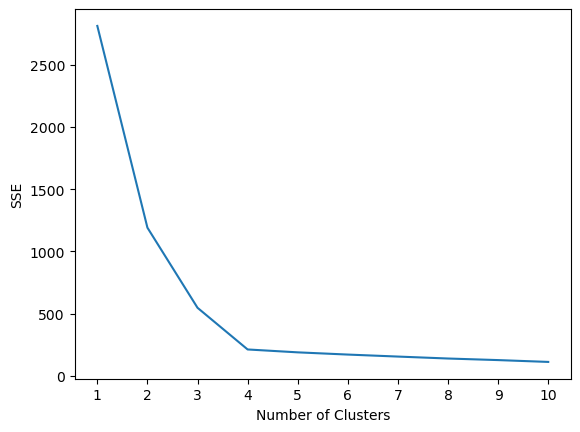

In [10]:
# plot the data
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, [kneed](https://pypi.org/project/kneed/), to identify the elbow point programmatically.

### The silhouette coefficient

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:
1. How close the data point is to other points in the cluster
2. How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [11]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)
    print(f"With {k} clusters the score was {score}")

C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 2 clusters the score was 0.5426422297358302


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 3 clusters the score was 0.5890390393551768


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 4 clusters the score was 0.6819938690643478


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 5 clusters the score was 0.5923875148758644


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 6 clusters the score was 0.49563409602576675


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 7 clusters the score was 0.4277257665723784


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 8 clusters the score was 0.3225206419519745


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 9 clusters the score was 0.3335178002757918


C:\Users\saarp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


With 10 clusters the score was 0.3459861201842673


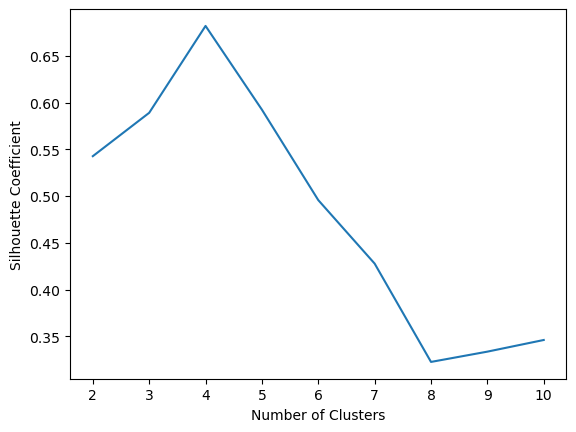

In [10]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Hierarchical Clustering

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Hierarchical clustering groups together data points with similar characteristics.

There are two types of hierarchical clustering: agglomerative and divisive. 
* Agglomerative: data points are clustered using a bottom-up approach starting with individual data points
* Divisive: all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

Today, we'll focus on agglomerative clustering.


https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html  
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn  
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/  

### Steps to perform agglomerative clustering
1. Treat each data point as its own cluster. The number of clusters at the start will be $K$, where $K$ is the number of data points.
2. Reduce the data to $K-1$ clusters by joining the two closest clusters (data points).
3. Reduce the data to $K-2$ clusters by again joining the two closest clusters.
4. Repeat this process until one big cluster is formed.
5. Develop dendograms to analyze the clusters. 

### Visualisation 
Here is a [video](https://www.youtube.com/watch?v=OSyeDeWeQ6o) for visualising the prosses of hierarchical clustering.

### Worked Example

In [11]:
# import packages 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [12]:
# make up data
points = np.array([[5,3],
                   [10,15],
                   [15,12],
                   [24,10],
                   [30,30],
                   [85,70],
                   [71,80],
                   [60,78],
                   [70,55],
                   [80,91],])

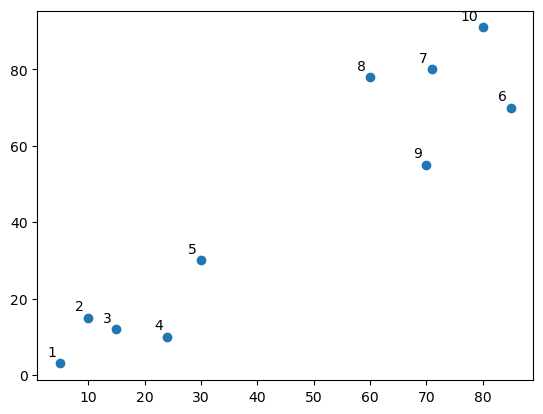

In [13]:
# plot the data
labels = range(1, 11)
plt.figure()
plt.scatter(points[:,0], 
            points[:,1], 
            label='True Position')

for label, x, y in zip(labels, points[:, 0], points[:, 1]):
    plt.annotate(label,
                 xy=(x, y), 
                 xytext=(-3, 3),
                 textcoords='offset points', 
                 ha='right', 
                 va='bottom')

### Do you see any "clusters"?

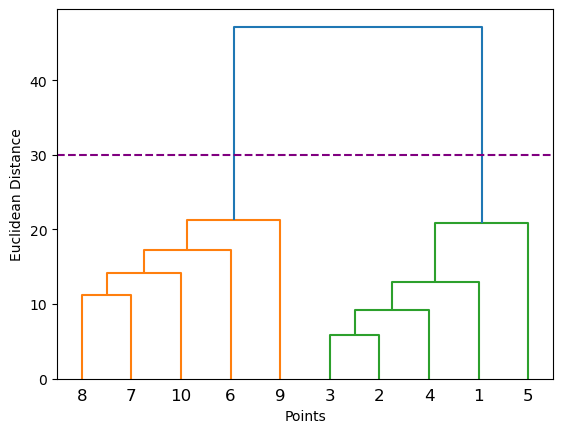

In [14]:
linked = shc.linkage(points, 'single')

labelList = range(1, 11)

fig = plt.figure()
shc.dendrogram(linked,
               orientation='top',
               labels=labelList,
               distance_sort='descending',
               show_leaf_counts=True)
plt.xlabel('Points')
plt.ylabel('Euclidean Distance')
plt.axhline(y= 30, c='purple', ls = '--')


#### Where is the longest distance without a horizontal line?

In [15]:
# create actual clusters
cluster = AgglomerativeClustering(n_clusters=2,
                                  affinity='euclidean', 
                                  linkage='ward')
cluster.fit_predict(points)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

#### The output array shows us which cluster each point is in

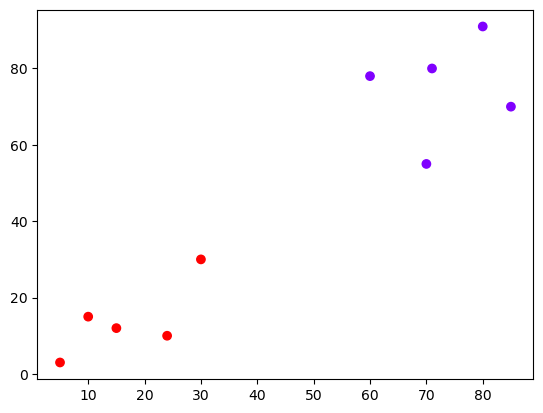

In [16]:
# plot the original data with the clusters
plt.scatter(points[:,0], points[:,1], 
            c=cluster.labels_, 
            cmap='rainbow')

### Example 2 -- Real Data
<a href="shopping-data.csv" download>download .csv here</a>

In [13]:
# import data
import pandas as pd
customer_data = pd.read_csv('shopping-data.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Spending Score (1-100)')

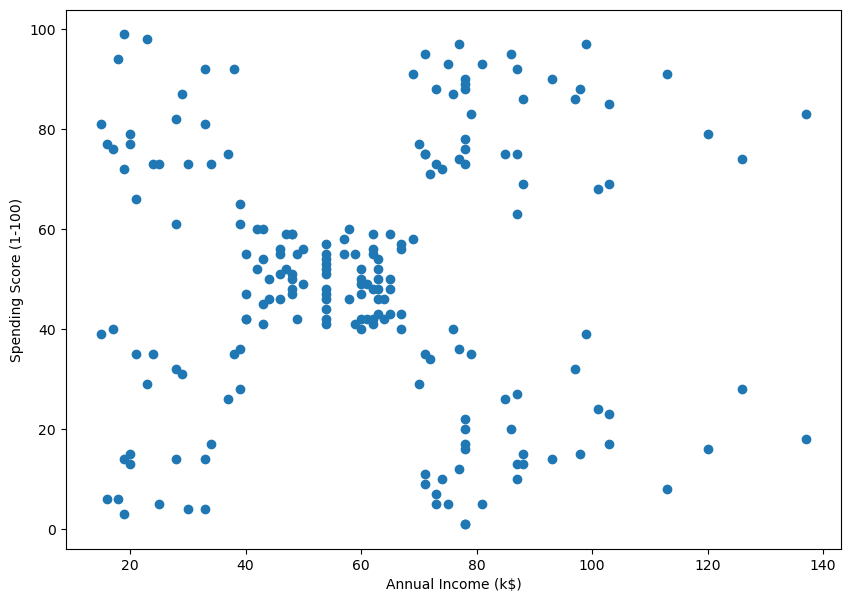

In [14]:
# isolate data from annual income and spending score columns
data = customer_data.iloc[:, 3:5].values
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

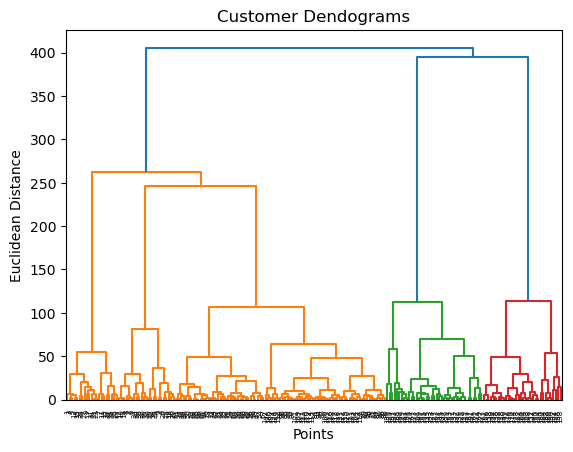

In [19]:
# examine dendogram
plt.figure()
plt.title("Customer Dendograms")
plt.xlabel('Points')
plt.ylabel('Euclidean Distance')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

### Finding the right number of clusters
#### Method 1: visualization
Where is the longest distance without a horizontal line?

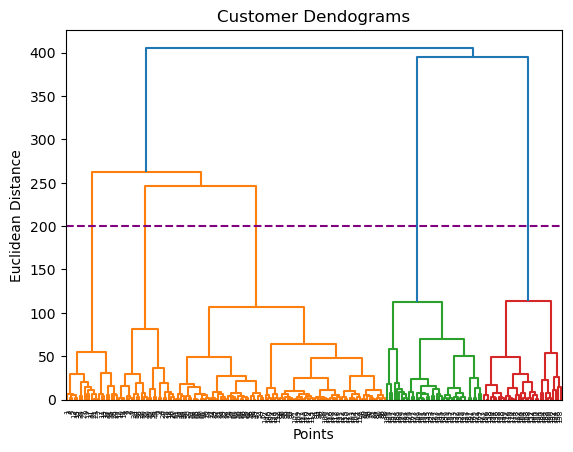

In [20]:
Z = shc.linkage(data, method='ward')

plt.figure()
plt.title("Customer Dendograms")
plt.xlabel('Points')
plt.ylabel('Euclidean Distance')
dend = shc.dendrogram(Z)
plt.axhline(y= 200, c='purple', ls = '--')

In [21]:
# create clusters
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Text(0, 0.5, 'Spending Score (1-100)')

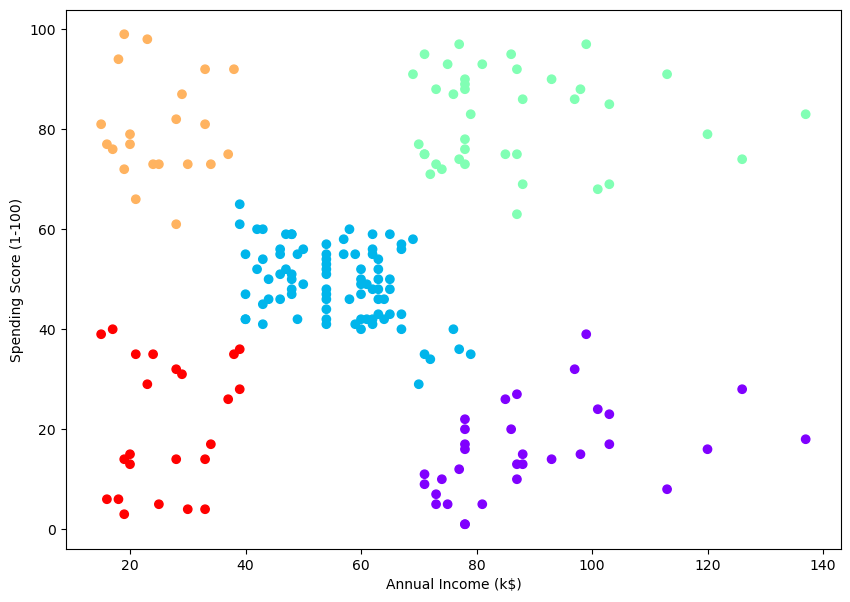

In [22]:
# look at the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

#### Method 2: threshold
we don't need to count the number of clusters, it's enough to give the threshold value.

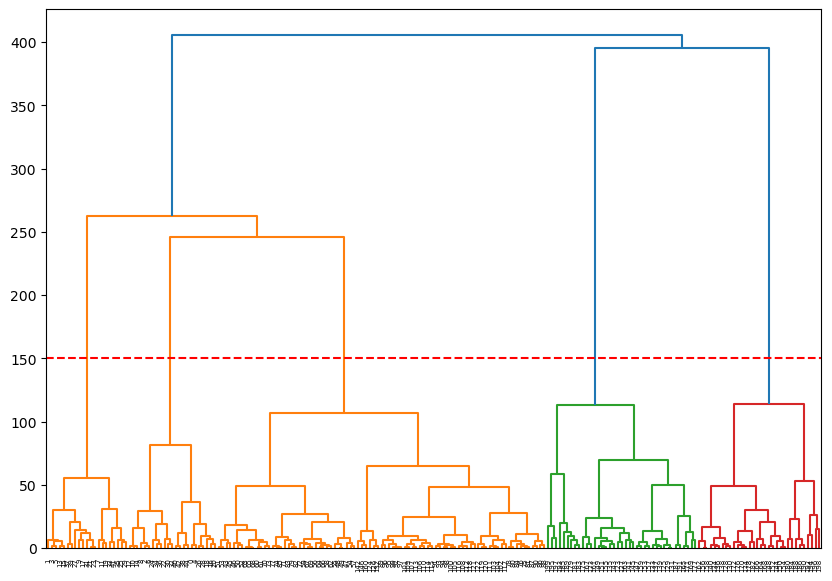

The number of clusters is: 5


In [23]:
# Set the threshold value where you want to cut the dendrogram
threshold_value = 150  # Adjust this value as needed

# Assuming 'data' is your dataset
Z = shc.linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(Z)
plt.axhline(y=threshold_value, color='r', linestyle='--')
plt.show()

# Get the cluster labels
clusters = fcluster(Z, threshold_value, criterion='distance')

# Print the number of clusters
num_clusters = len(set(clusters))
print(f'The number of clusters is: {num_clusters}')


#### Method 3: silhouette

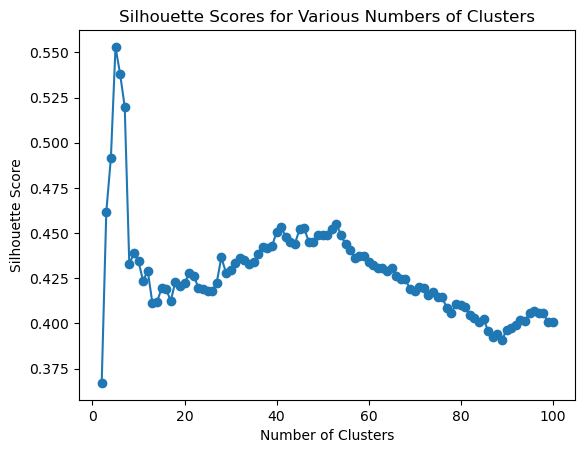

Max silhouette score at 5 clusters


In [24]:
# Assuming 'data' is your dataset and 'Z' is the linkage matrix
range_n_clusters = list(range(2, 101))
silhouette_scores = []

for n_clusters in range_n_clusters:
    cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    # print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")

# Plot the silhouette scores
fig, ax = plt.subplots()
ax.plot(range_n_clusters, silhouette_scores, marker='o')
ax.set_title('Silhouette Scores for Various Numbers of Clusters')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
plt.show()

print(f'Max silhouette score at {silhouette_scores.index(max(silhouette_scores))+2} clusters')


# Play Time
Use the dataset `cluster_play_data.csv` to play with the clustering method we learned. 
<a href="cluster_play_data.csv" download>download .csv here</a>  
**First step hint** - try to find out on what columns to preform the clustering.

In [25]:
#| code-fold: true
#| code-summary: "Answer part 1"
# import data

# # uncomment below:
# play = pd.read_csv('cluster_play_data.csv')
# play.head()

In [26]:
#| code-fold: true
#| code-summary: "Answer part 2"

# # uncomment below:
# sns.pairplot(play)

In [27]:
#| code-fold: true
#| code-summary: "Answer part 3"


# # uncomment below:
# # examine dendogram
# # isolate data from annual income and spending score columns
# # data = customer_data.iloc[:, 3:5].values
# data = play[['A','C']].values
# plt.figure()
# plt.title("Customer Dendograms")
# plt.xlabel('Points')
# plt.ylabel('Euclidean Distance')
# dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [28]:
#| code-fold: true
#| code-summary: "Answer part 4"

# # uncomment below:
# # create clusters
# cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
# cluster.fit_predict(data)

# # look at the clusters
# plt.figure(figsize=(10, 7))
# plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')